O método **Cosine Annealing com Warm Restarts** foi proposto por *Ilya Loshchilov* e *Frank Hutter* em **2016**.  
Ele consiste em **reiniciar periodicamente a taxa de aprendizado (learning rate)** de acordo com uma **curva cosenoidal**, o que faz com que o *learning rate* volte a subir após cada ciclo.

Essa estratégia oferece duas grandes vantagens:

- **Evita mínimos locais e platôs**, pois o aumento periódico da taxa de aprendizado permite ao otimizador escapar dessas regiões.  
- **Equilibrio entre exploração e refinamento**, permitindo que o modelo explore rapidamente no início e otimize com mais precisão posteriormente.

Os autores recomendam:

1. Começar com **ciclos curtos** de *cosine annealing*.  
2. Dobrar o valor de $T_{\text{max}}$  (duração do ciclo) após cada reinício.  

> Isso permite que o treinamento realize **explorações rápidas no início** e, gradualmente, faça **otimizações mais longas e estáveis**, ajudando a escapar de platôs ao longo do processo.

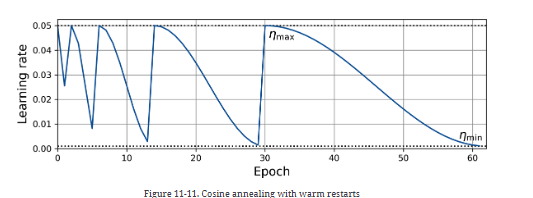

##Implementação no PyTorch

O **PyTorch** já oferece suporte a este tipo de agendamento através da classe:

```python
torch.optim.lr_scheduler.CosineAnnealingWarmRestarts

Antes de usar o agendador, é importante entender os principais parâmetros que controlam o comportamento do **Cosine Annealing com Warm Restarts**. Esses parâmetros definem a duração dos ciclos, como eles aumentam ao longo do treinamento e qual o valor mínimo da taxa de aprendizado.


### Principais parâmetros

- **`T_0`** → duração do primeiro ciclo (em épocas).  
- **`T_mult`** → fator pelo qual `T_0` é multiplicado a cada reinício.  
  - Exemplo: `T_mult=2` dobra a duração de cada novo ciclo.  
- **`eta_min`** → valor mínimo da taxa de aprendizado (default = 0).  


A seguir, criamos um agendador de taxa de aprendizado usando **Cosine Annealing com Warm Restarts** no PyTorch.  
Neste exemplo, definimos `T_0=2` (duração do primeiro ciclo), `T_mult=2` (cada novo ciclo terá o dobro da duração do anterior) e `eta_min=0.001` (taxa de aprendizado mínima):

```python
cosine_repeat_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=2, T_mult=2, eta_min=0.001
)

Esse agendador faz o learning rate oscilar de forma controlada, repetindo ciclos de decaimento e reinício, permitindo que o otimizador:

Escape de mínimos locais; Explore rapidamente no início do treinamento;
Alcance melhores resultados de generalização ao longo do processo.

##Cycle Scheduling



Outro agendamento de aprendizado bastante popular é o **1cycle**, introduzido por *Leslie Smith* em **2018**.  
O funcionamento básico é o seguinte:

1. **Aquecimento inicial (Warm-up)**:  
   - A taxa de aprendizado começa em $\eta_0$ e cresce **linearmente** até $\eta_1$ na metade do treinamento.  
   - O valor máximo $\eta_1$ é escolhido usando a mesma abordagem para encontrar a **taxa de aprendizado ótima**, e $\eta_0$ costuma ser **10 vezes menor**.  

2. **Decaimento linear**:  
   - Durante a segunda metade do treinamento, a taxa de aprendizado diminui **linearmente** de volta a $\eta_0$.  
   - Nos últimos epochs, a taxa de aprendizado é reduzida ainda mais, por várias ordens de magnitude (ainda linearmente).

3. **Ajuste de momentum (se usado)**:  
   - Começa alto (ex.: 0.95), cai para um valor menor durante a primeira metade do treinamento (ex.: 0.85), e volta para o valor máximo na segunda metade, mantendo o máximo nos últimos epochs.

---

###  Benefícios do 1cycle

- Pode **acelerar consideravelmente o treinamento**.  
- Melhora a performance final da rede.  
- Exemplo: no dataset **CIFAR-10**, o agendamento 1cycle alcançou **91,9% de acurácia em 100 epochs**, enquanto a abordagem padrão levou 800 epochs para chegar a **90,3%**.  
- Esse efeito ficou conhecido como **super-convergence**.

---

###  Implementação no PyTorch

O PyTorch implementa esse agendamento através do **`OneCycleLR` scheduler**.

💡 **Dica**:

- Se não tiver certeza de qual agendamento usar, **1cycle é um bom padrão**.  
- Para instabilidades no início do treinamento, adicione **learning rate warm-up**.  
- Para platôs durante o treinamento, experimente **cosine annealing com warm restarts**.

---

### Observação

Além dos agendamentos populares já discutidos, o PyTorch oferece outros schedulers, como:

- Scheduler polinomial.  
- Scheduler cíclico.  
- Scheduler que permite **encadear outros schedulers**.  
- Entre outros.  

> Vale a pena conferir a documentação do PyTorch para explorar essas opções.

---

### Próximo tópico: Regularização

Antes de encerrar este capítulo, é importante falar sobre **regularização**, pois redes profundas são altamente propensas a **overfitting**, tornando a regularização um aspecto essencial do treinamento.

##Avoiding Overfitting Through Regularization

> “Com quatro parâmetros posso ajustar um elefante e com cinco posso fazê-lo balançar a tromba.”  
> — John von Neumann, citado por Enrico Fermi, *Nature* 427

Essa frase ilustra um ponto importante sobre redes neurais: **quanto mais parâmetros uma rede possui, mais flexível ela se torna**. Redes profundas modernas podem ter **dezenas de milhares, milhões ou até bilhões de parâmetros**, o que permite que se ajustem a uma enorme variedade de datasets complexos.

No entanto, essa grande flexibilidade também traz um risco: **overfitting**, quando a rede aprende padrões específicos do conjunto de treinamento que não se generalizam bem para novos dados.

---

## 1. O que é Regularização?

**Regularização** é um conjunto de técnicas usadas para **prevenir o overfitting** e melhorar a capacidade de generalização da rede.  
O objetivo é **limitar a complexidade do modelo** sem reduzir sua capacidade de aprendizado.

---

## 2. Técnicas Comuns de Regularização

### 2.1 Early Stopping
- Interrompe o treinamento **antes que a rede comece a se ajustar demais aos dados de treino**.  
- Já foi implementada no Capítulo 4.

### 2.2 Normalização de Camadas
- **Batch Normalization** e **Layer Normalization** foram criadas para estabilizar os gradientes durante o treinamento.  
- Além disso, funcionam como bons regularizadores.

### 2.3 Outras Técnicas Populares
- **ℓ1 e ℓ2 Regularization**: Penalizam pesos muito grandes, evitando que o modelo dependa excessivamente de alguns neurônios.  
- **Dropout**: Desativa aleatoriamente neurônios durante o treinamento, forçando a rede a aprender representações mais robustas.  
- **MC Dropout**: Variante do Dropout que também permite estimar a incerteza das previsões.  
- **Max-Norm Regularization**: Limita o tamanho máximo dos vetores de peso da rede.

---

> **Resumo:** Redes muito flexíveis podem aprender quase qualquer coisa, mas nem tudo é útil. A regularização funciona como uma “freada”, ajudando a rede a aprender **padrões importantes** sem memorizar os dados de treino.


##ℓ1 and ℓ2 Regularization

Assim como fizemos no Capítulo 4 para modelos lineares simples, você pode aplicar **regularização ℓ₂ (L2)** para **constrain os pesos das conexões** de uma rede neural.  

Se você deseja um modelo **esparso** (com muitos pesos iguais a zero), pode usar **regularização ℓ₁ (L1)**.

> 💡 Dica: A regularização ℓ₂ é matematicamente equivalente ao **weight decay** quando se utiliza o otimizador **SGD** (com ou sem momentum). Isso significa que você pode implementá-la simplesmente definindo o argumento `weight_decay` no otimizador.

### Exemplo em PyTorch

Para aplicar ℓ₂ regularização a todos os pesos de um modelo treinado com **SGD**, usando um fator de regularização de $10^{-4}$:

```python
optimizer = torch.optim.SGD(model.parameters(), lr=0.05, weight_decay=1e-4)


Com isso, o otimizador aplicará automaticamente a penalização ℓ₂ aos **pesos das conexões** durante o treinamento. Isso ajuda a:

- Evitar que os pesos cresçam demais.
- Reduzir o **overfitting** do modelo.
- Melhorar a estabilidade do treinamento.

Se você estiver usando o otimizador **Adam**, o recomendado é utilizar **AdamW** e definir também o argumento `weight_decay`. Embora não seja exatamente a mesma coisa que ℓ₂, o resultado é bastante próximo e geralmente funciona melhor.

**Observação:** O `weight_decay` é aplicado a **todos os parâmetros do modelo**, incluindo bias e parâmetros de batch-norm ou layer-norm. Isso pode não contribuir significativamente para a regularização e, às vezes, pode até prejudicar a performance do treinamento. Mais adiante, veremos como aplicar regularização apenas a parâmetros selecionados.


## Dropout

O **Dropout** foi proposto por Geoffrey Hinton et al. em 2012 e detalhado posteriormente em um artigo⁠33 de 2014 por Nitish Srivastava et al., e tem se mostrado altamente bem-sucedido: muitas redes neurais de ponta utilizam dropout, pois ele proporciona um aumento de 1%–2% na acurácia. Isso pode não parecer muito, mas quando um modelo já possui 95% de acurácia, obter um aumento de 2% significa reduzir a taxa de erro em quase 40% (passando de 5% de erro para aproximadamente 3%).

É um algoritmo relativamente simples: a cada passo de treinamento, cada neurônio (incluindo os neurônios de entrada, mas sempre excluindo os neurônios de saída) tem uma probabilidade **p** de ser temporariamente “desligado”, ou seja, será totalmente ignorado durante este passo de treinamento, mas pode estar ativo no próximo passo (veja a Figura 11-12). O hiperparâmetro **p** é chamado de **taxa de dropout**, e normalmente é definido entre 10% e 50%: mais próximo de 20%–30% em redes neurais recorrentes (veja o Capítulo 13), e mais próximo de 40%–50% em redes neurais convolucionais (veja o Capítulo 12). Após o treinamento, os neurônios não são mais desligados. E isso é tudo (exceto por um detalhe técnico que discutiremos em breve).

É surpreendente, à primeira vista, que essa técnica destrutiva funcione. Será que uma empresa teria um desempenho melhor se seus funcionários fossem instruídos a jogar uma moeda toda manhã para decidir se iriam trabalhar? Bem, quem sabe; talvez funcionasse! A empresa seria forçada a adaptar sua organização; não poderia depender de uma única pessoa para operar a máquina de café ou realizar outras tarefas críticas, então essa expertise teria que ser espalhada entre várias pessoas. Os funcionários teriam que aprender a cooperar com muitos colegas, e não apenas com alguns poucos. A empresa se tornaria muito mais resiliente. Se uma pessoa saísse, não faria tanta diferença. Não está claro se essa ideia funcionaria realmente para empresas, mas certamente funciona para redes neurais. Neurônios treinados com dropout não podem co-adaptar com seus vizinhos; eles precisam ser o mais úteis possível por conta própria. Eles também não podem depender excessivamente de apenas alguns neurônios de entrada; devem prestar atenção a todos os seus neurônios de entrada. Como resultado, tornam-se menos sensíveis a pequenas variações nos inputs. No fim, obtém-se uma rede mais robusta que generaliza melhor.


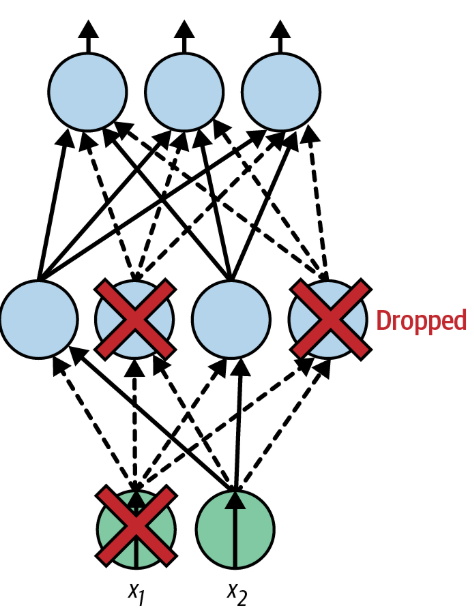

Outra forma de entender o poder do **dropout** é perceber que uma rede neural única é gerada a cada passo de treinamento. Como cada neurônio pode estar presente ou ausente, há um total de 2^N redes possíveis (onde N é o número total de neurônios que podem ser "desligados"). Esse número é tão grande que é virtualmente impossível que a mesma rede neural seja amostrada duas vezes. Depois de realizar 10.000 passos de treinamento, você terá essencialmente treinado 10.000 redes neurais diferentes, cada uma com apenas uma instância de treinamento. Essas redes obviamente não são independentes, pois compartilham muitos de seus pesos, mas, ainda assim, são todas diferentes. A rede neural resultante pode ser vista como um **ensemble** que faz uma média de todas essas redes menores.

**Dica:**  
As camadas mais altas, que aprendem combinações de características mais complexas, se beneficiam mais do dropout porque são mais propensas a overfitting. Portanto, geralmente você pode aplicar dropout apenas aos neurônios das últimas camadas ocultas (por exemplo, de uma a três camadas ocultas). No entanto, você deve evitar desligar os neurônios de saída, pois isso seria como mudar a tarefa durante o treinamento — isso não ajudaria.

Há um detalhe técnico pequeno, mas importante. Suponha que p = 75%: em média, apenas 25% de todos os neurônios estão ativos a cada passo durante o treinamento. Isso significa que, após o treinamento, cada neurônio recebe em média quatro vezes mais entradas do que durante o treinamento. Essa discrepância é tão grande que o modelo provavelmente não funcionaria bem. Para evitar esse problema, uma solução simples é multiplicar as entradas por 4 durante o treinamento, o que equivale a dividi-las por 25%. De forma mais geral, precisamos dividir as entradas pela **probabilidade de manter o neurônio ativo** (1 – p) durante o treinamento.

Para implementar dropout em **PyTorch**, você pode usar a camada `nn.Dropout`. É importante alternar para o modo de treinamento durante o treinamento e para o modo de avaliação durante a avaliação (assim como ocorre com batch norm). No modo de treinamento, a camada desliga aleatoriamente algumas entradas (configurando-as para 0) e divide as entradas restantes pela probabilidade de manutenção. No modo de avaliação, ela não faz nada; apenas passa as entradas para a próxima camada.

**Aviso:**  
Como o dropout só é ativo durante o treinamento, comparar a perda de treinamento com a perda de validação pode ser enganoso. Em particular, um modelo pode estar sobreajustando o conjunto de treinamento e ainda assim apresentar perdas de treinamento e validação semelhantes. Portanto, certifique-se de avaliar a perda de treinamento **sem dropout** (por exemplo, após o treinamento).

Se você observar que o modelo está overfitting, pode aumentar a taxa de dropout. Por outro lado, se o modelo estiver subajustando (underfitting) o conjunto de treinamento, tente diminuir a taxa de dropout. Também pode ser útil aumentar a taxa de dropout para camadas grandes e reduzi-la para camadas pequenas. Além disso, muitas arquiteturas de ponta aplicam dropout apenas nas últimas camadas ocultas, então você pode querer tentar isso se o dropout completo for muito intenso.

O **dropout** tende a reduzir significativamente a velocidade de convergência, mas geralmente resulta em um modelo melhor quando ajustado corretamente. Portanto, geralmente vale a pena o esforço extra, especialmente para modelos grandes.

**Dica:**  
Se você quiser regularizar uma rede **self-normalizing** baseada na função de ativação SELU, deve usar **alpha dropout**: uma variante do dropout que preserva a média e o desvio padrão de suas entradas. Ele foi introduzido no mesmo artigo que apresentou a SELU, já que o dropout comum quebraria a auto-normalização. No PyTorch, isso é implementado na camada `nn.AlphaDropout`.


In [4]:
import torchmetrics
from torch.utils.data import DataLoader
import torch
import torch.nn as nn


# Configuração do dispositivo (Hardware Acceleration)
if torch.cuda.is_available():
    device = "cuda"
elif hasattr(torch.backends, "mps") and torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"

print(f"Usando o dispositivo: {device}")


# Definição da função de inicialização de He (Kaiming)
def use_he_init(module):
    if isinstance(module, nn.Linear):
        nn.init.kaiming_uniform_(module.weight)
        nn.init.zeros_(module.bias)


torch.manual_seed(42)
model = nn.Sequential(
    nn.Flatten(),
    nn.Dropout(p=0.2), nn.Linear(28 * 28, 100), nn.ReLU(),
    nn.Dropout(p=0.2), nn.Linear(100, 100), nn.ReLU(),
    nn.Dropout(p=0.2), nn.Linear(100, 10)
).to(device)
model.apply(use_he_init)

def test_optimizer(model, optimizer, n_epochs=10, batch_size=32):
    train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
    valid_loader = DataLoader(valid_set, batch_size=32)
    test_loader = DataLoader(test_set, batch_size=32)
    xentropy = nn.CrossEntropyLoss()
    accuracy = torchmetrics.Accuracy(task="multiclass", num_classes=10)
    history = train(model, optimizer, xentropy, accuracy.to(device),
                    train_loader, valid_loader, n_epochs)
    return history, evaluate_tm(model, test_loader, accuracy)

optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
history_dropout, acc_dropout = test_optimizer(model, optimizer, batch_size=32)

Usando o dispositivo: cuda


NameError: name 'test_optimizer' is not defined

##Monte Carlo Dropout

Em 2016, o pesquisador Yarin Gal e Zoubin Ghahramani trouxe mais alguns bons motivos para usar **dropout**:

Primeiro, o artigo estabeleceu uma conexão profunda entre redes com dropout (ou seja, redes neurais contendo camadas Dropout) e **inferência bayesiana aproximada**⁠35, dando ao dropout uma sólida justificativa matemática.

Segundo, os autores introduziram uma técnica poderosa chamada **Monte Carlo (MC) dropout**, que pode melhorar o desempenho de qualquer modelo com dropout já treinado, sem precisar retreiná-lo ou modificá-lo. Ela também fornece uma estimativa muito melhor da **incerteza do modelo** e pode ser implementada em poucas linhas de código.

Essa descrição do MC dropout pode parecer um “truque estranho”, então vamos explicar: é como o dropout normal, mas ativo **não apenas durante o treinamento**, mas também durante a avaliação. Isso significa que as previsões sempre terão um certo grau de aleatoriedade (daí o nome Monte Carlo). Mas, em vez de fazer uma única previsão, fazemos muitas previsões e calculamos a média delas. Isso geralmente produz previsões melhores do que o modelo original.

O procedimento funciona assim:

1. Primeiro, colocamos o modelo em **modo de avaliação**, como sempre antes de fazer previsões, mas, em seguida, mudamos imediatamente todas as camadas de dropout de volta para **modo de treinamento**, para que se comportem como durante o treinamento (ou seja, desligando aleatoriamente algumas de suas entradas). Em outras palavras, transformamos as camadas de dropout em **camadas MC dropout**.

2. Carregamos um novo lote de imagens \(X_{new}\) e o enviamos para a GPU. No exemplo, assumimos que \(X_{new}\) contém três imagens.

3. Repetimos cada imagem várias vezes (por exemplo, 100) para criar um lote grande. Assim, cada imagem será avaliada múltiplas vezes, introduzindo variabilidade devido ao dropout ativo.

4. Passamos esse lote grande pelo modelo, obtendo previsões (logits) para cada cópia das imagens. Em seguida, convertimos esses logits em **probabilidades** usando a função softmax.

5. Finalmente, calculamos a **média** das probabilidades ao longo das cópias para cada imagem, obtendo a previsão final.

**Aviso:**  
Não troque a ordem das operações (primeiro média, depois softmax), pois isso não reflete corretamente a incerteza do modelo e tende a gerar previsões excessivamente confiantes.

O MC dropout tende a **melhorar a confiabilidade das estimativas de probabilidade** do modelo, tornando-o menos propenso a erros confiantes — importante, por exemplo, em carros autônomos ou sistemas médicos. Ele também permite analisar as **k classes mais prováveis**, não apenas a classe mais provável, e calcular a **desvio padrão** das probabilidades de cada classe, adicionando um “grão de sal” às previsões.

**Nota:**  
O número de amostras Monte Carlo (100 neste exemplo) é um hiperparâmetro que você pode ajustar. Quanto maior, mais precisas são as previsões e estimativas de incerteza, mas mais lento é o processo. Acima de certo número, há pouco ganho adicional. É importante equilibrar **latência, throughput e acurácia** conforme a aplicação.

Se você quiser treinar um modelo MC dropout do zero, em vez de reutilizar um modelo já treinado com dropout, é recomendável usar um módulo customizado de MC dropout, pois “hackear” nn.Dropout pode ser frágil em algumas funções de avaliação.

Em resumo, o **MC dropout** é uma excelente técnica que melhora os modelos com dropout e fornece melhores estimativas de incerteza. E, claro, como é apenas o dropout regular durante o treinamento, também atua como um **regularizador**.


In [ ]:
from torchvision import datasets, transforms
import torch.nn as nn

# Load the Fashion MNIST dataset (if not already loaded globally)
fashion_mnist = datasets.FashionMNIST(root='./data', train=False, download=True)



In [ ]:
model.eval()
for module in model.modules():
    if isinstance(module, nn.Dropout):
        module.train()

X_new = torch.FloatTensor(fashion_mnist.data[:3].reshape(3, 1, 28, 28) / 255)
X_new = X_new.to(device)

torch.manual_seed(42)
with torch.no_grad():
    X_new_repeated = X_new.repeat_interleave(100, dim=0)
    y_logits_all = model(X_new_repeated).reshape(3, 100, 10)
    y_probas_all = torch.nn.functional.softmax(y_logits_all, dim=-1)
    y_probas = y_probas_all.mean(dim=1)

In [ ]:
y_probas.round(decimals=2)

In [ ]:
y_std = y_probas_all.std(dim=1)
y_std.round(decimals=2)

In [ ]:
class McDropout(nn.Dropout):
    def forward(self, input):
        return F.dropout(input, self.p, training=True)

In [ ]:
def mean_prediction(model, X, n_repeats):
    X_new_repeated = X_new.repeat_interleave(n_repeats, dim=0)
    y_logits = model(X_new_repeated)
    y_logits_all = y_logits.reshape(X.shape[0], n_repeats, *y_logits.shape[1:])
    y_probas_all = torch.nn.functional.softmax(y_logits_all, dim=-1)
    return y_probas_all.mean(dim=1)

In [ ]:
with torch.no_grad():
  y_mean_pred = mean_prediction(model, X_new, 100)

y_mean_pred.round(decimals=2)

##Max-Norm Regularization

Outra técnica de **regularização** relativamente popular para redes neurais é chamada **max-norm regularization**. Para cada neurônio, ela **constrange os pesos** $w$ das conexões de entrada de forma que $\| w \|_2 \leq r$, onde $r$ é o hiperparâmetro max-norm e $\| \cdot \|_2$ é a norma $ℓ2$.

Reduzir $r$ aumenta a intensidade da regularização e ajuda a reduzir o **overfitting**. A regularização max-norm também pode ajudar a aliviar problemas de **gradientes instáveis**, caso você não utilize batch-norm ou layer-norm.

Ao invés de adicionar um termo de regularização à função de perda, a regularização max-norm é geralmente implementada **calculando a norma ℓ2 dos pesos após cada passo de treinamento e redimensionando-os se necessário**.

O processo funciona assim:

1. Para cada matriz de pesos do modelo (todos os parâmetros, exceto bias), calcula-se a norma ℓ2 de cada neurônio.
2. Determina-se a **norma alvo**: se algum neurônio tiver norma maior que $r$, essa norma é limitada a $r$.
3. Os pesos são **reescalonados** para que cada neurônio tenha a norma desejada. Um pequeno termo de suavização é usado para evitar divisões por zero caso algum neurônio tenha norma zero.

Depois disso, basta chamar a função de aplicação do max-norm **no loop de treinamento**, logo após o passo do otimizador. É importante também ajustar o hiperparâmetro **max_norm** de acordo com o seu problema.

**Dica:**  
Ao usar max-norm em camadas que não sejam `nn.Linear`, pode ser necessário ajustar o argumento `dim`. Por exemplo, em **camadas convolucionais**, geralmente define-se `dim=[1, 2, 3]` para limitar a norma de cada kernel convolucional.


In [ ]:
def apply_max_norm(model, max_norm=2, epsilon=1e-8, dim=1):
    with torch.no_grad():
        for name, param in model.named_parameters():
            if 'bias' not in name:
                actual_norm = param.norm(p=2, dim=dim, keepdim=True)
                target_norm = torch.clamp(actual_norm, 0, max_norm)
                param *= target_norm / (epsilon + actual_norm)

In [ ]:
torch.manual_seed(42)

n_epochs = 3
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
loss_fn = nn.CrossEntropyLoss()

model = build_model()  # extra code
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
for epoch in range(n_epochs):
    total_loss = 0.0
    for X_batch, y_batch in train_loader:
        model.train()
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        apply_max_norm(model)
    print(f"Epoch {epoch + 1}/{n_epochs}"
          f" – loss: {total_loss / len(train_loader):.3f}")